In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('venues_all.csv')
df.head()

,name,categories,lat,lng
0,Sayaji,Hotel,18.599535,73.754995
1,Natural Ice Cream,Ice Cream Shop,18.591192,73.752440
2,Barbeque Nation,BBQ Joint,18.599390,73.755090
3,Courtyard by Marriott,Hotel,18.591527,73.746831
4,Little Italy,Italian Restaurant,18.591513,73.743668


In [3]:
df.shape

(424, 4)

In [5]:
from sklearn.cluster import KMeans

In [6]:
Clus_dataSet = df[['lat','lng']] 
Clus_dataSet.head()

,lat,lng
0,18.599535,73.754995
1,18.591192,73.752440
2,18.599390,73.755090
3,18.591527,73.746831
4,18.591513,73.743668


In [7]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [8]:
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet[0:5]

array([[ 0.86938101, -1.25073464],
       [ 0.67636425, -1.3009986 ],
       [ 0.86600786, -1.24886266],
       [ 0.68412166, -1.41130692],
       [ 0.68379116, -1.47351958]])

In [13]:
dist = []
list_k = list(range(1, 12))      # list of values of k to test for

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Clus_dataSet)
    dist.append(km.inertia_)   

Text(0, 0.5, 'Sum of squared distance')

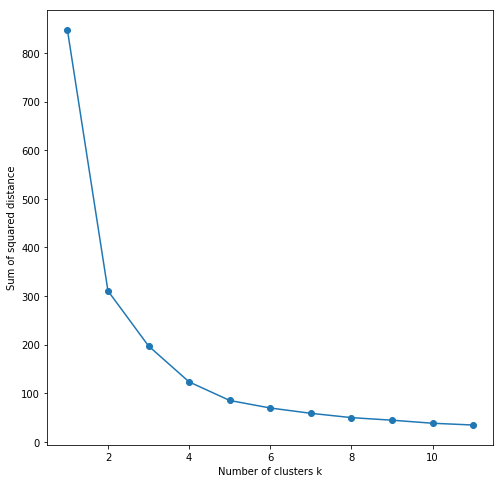

In [14]:
# Plot dist against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, dist, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')

In [22]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 2,
       4, 4, 1, 1, 2, 2, 1, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2,
       2, 2, 1, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 1,
       1, 2, 2, 1, 2, 2, 2, 4, 4, 4, 2, 2, 1, 4, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 4, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 2, 1, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0,
       4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
color_options = [
    'black', 'blue', 'darkgreen',
    'darkred', 'gray', 'green', 'lightblue', 'lightgreen', 'lightred',
    'orange', 'purple', 'red'
]

In [18]:
import folium
from folium import plugins

In [31]:
map_ = folium.Map(location=[df.lat[0], df.lng[0]], zoom_start=11)
# add markers to map
for lat, lng, Categories, name, lab in zip(df['lat'], df['lng'], df['categories'], df['name'], labels):
    label = '{}, {}'.format(name, Categories, lab)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color=color_options[lab],
        fill=True,
        fill_opacity=1,
        parse_html=False).add_to(map_)  
    
map_